In [7]:
#本次作业的数据集Wien reviews 和 Oakland Crime Statistics 2011 to 2016
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 首先分析wine reviews数据集

## 1. 数据可视化和摘要 ##
### 1.1 数据摘要

In [12]:
#导入数据
wine_1 = pd.read_csv("D:\\datamining2021\\datasets\\winemag\\winemag-data_first150k.csv")
wine_2 = pd.read_csv("D:\\datamining2021\\datasets\\winemag\\winemag-data-130k-v2.csv")
print(wine_1.shape,wine_2.shape)
print(wine_1.columns.values.tolist(),wine_2.columns.values.tolist()  ) #输出各列名

(150930, 11) (129971, 14)
['Unnamed: 0', 'country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'variety', 'winery'] ['Unnamed: 0', 'country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']


In [15]:
#合并数据
wine = pd.concat([wine_1, wine_2], ignore_index=True)
wine=wine.drop(labels='Unnamed: 0', axis=1)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280901 entries, 0 to 280900
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                280833 non-null  object 
 1   description            280901 non-null  object 
 2   designation            197701 non-null  object 
 3   points                 280901 non-null  int64  
 4   price                  258210 non-null  float64
 5   province               280833 non-null  object 
 6   region_1               234594 non-null  object 
 7   region_2               111464 non-null  object 
 8   variety                280900 non-null  object 
 9   winery                 280901 non-null  object 
 10  taster_name            103727 non-null  object 
 11  taster_twitter_handle  98758 non-null   object 
 12  title                  129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 27.9+ MB


In [17]:
#去重
wine.duplicated().value_counts()
wine.drop_duplicates()
wine.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN


#### 1.1.1 标称属性

In [19]:
#显然该数据集的标称属性有country、province、region_1、region_2、variety、winery
#统计各标称属性的数量
wine['country'].value_counts()

US                        116901
France                     43191
Italy                      43018
Spain                      14913
Portugal                   11013
Chile                      10288
Argentina                   9431
Australia                   7286
Austria                     6402
New Zealand                 4739
Germany                     4617
South Africa                3659
Greece                      1350
Israel                      1135
Canada                       453
Hungary                      377
Romania                      259
Bulgaria                     218
Uruguay                      201
Slovenia                     181
Croatia                      162
Turkey                       142
Mexico                       133
Moldova                      130
Georgia                      129
England                       83
Brazil                        77
Lebanon                       72
Cyprus                        42
Morocco                       40
Macedonia 

In [20]:
wine['province'].value_counts()

California                       80755
Washington                       18389
Tuscany                          13178
Bordeaux                         12052
Oregon                            9962
                                 ...  
Santa Barbara County-Condrieu        1
Paardeberg                           1
Ceres Plateau                        1
Hawaii                               1
Rose Valley                          1
Name: province, Length: 490, dtype: int64

In [21]:
wine['region_1'].value_counts()

Napa Valley                               10689
Columbia Valley (WA)                       9099
Russian River Valley                       6662
California                                 6091
Mendoza                                    5887
                                          ...  
San Luis Obispo-Sonoma-Monterey               1
San Martino della Battaglia                   1
Aglianico d'Irpinia                           1
Vin de Pays de Sainte-Marie la Blanche        1
Hawaii                                        1
Name: region_1, Length: 1332, dtype: int64

In [22]:
wine['region_2'].value_counts()

Central Coast              24122
Sonoma                     20286
Columbia Valley            17260
Napa                       15615
Willamette Valley           6604
California Other            6179
Finger Lakes                3287
Sierra Foothills            3122
Napa-Sonoma                 2814
Mendocino/Lake Counties     2389
Central Valley              2177
Southern Oregon             1579
Long Island                 1451
Oregon Other                1388
North Coast                 1216
Washington Other            1127
South Coast                  470
New York Other               378
Name: region_2, dtype: int64

In [23]:
wine['variety'].value_counts()

Pinot Noir                  27563
Chardonnay                  26235
Cabernet Sauvignon          22272
Red Blend                   19008
Bordeaux-style Red Blend    14262
                            ...  
Bombino Nero                    1
Kangoun                         1
Malagouzia-Chardonnay           1
Tinto Velasco                   1
Biancale                        1
Name: variety, Length: 756, dtype: int64

In [24]:
wine['winery'].value_counts()

Williams Selyem          585
Testarossa               492
DFJ Vinhos               473
Chateau Ste. Michelle    419
Wines & Winemakers       391
                        ... 
WYSIWYG                    1
Magpie Estate              1
Château Pey de Pont        1
Quinta Sardonia            1
Mia Bea                    1
Name: winery, Length: 19186, dtype: int64

#### 1.1.2 数值属性

In [25]:
#wine reviews的数据集数值属性包括points 和 price
#其五数概括如下
wine.describe()

,points,price
count,280901.000000,258210.000000
mean,88.146934,34.177162
std,3.151528,38.611708
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,25.000000
75%,90.000000,40.000000
max,100.000000,3300.000000


**min 25% 50% 75% max 就是point和price这两个数值属性的五数概括**

In [26]:
#每一列缺失值个数统计如下
wine.isnull().sum(axis=0)

country                      68
description                   0
designation               83200
points                        0
price                     22691
province                     68
region_1                  46307
region_2                 169437
variety                       1
winery                        0
taster_name              177174
taster_twitter_handle    182143
title                    150930
dtype: int64

**可以看到points属性没有缺失值，price确实22691个值**

### 1.2 数据可视化

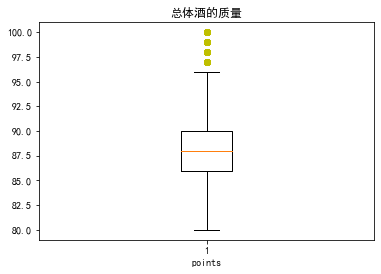

In [82]:
#检查数据分布即离群点 
#price属性有缺失值无法画盒图.因此先过滤掉缺失值
#画盒图进行points与price的可视化
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文
plt.rcParams['axes.unicode_minus'] = False # 正常显示负号
plt.boxplot(wine['points'], notch=False, sym='y', vert=True)
plt.xlabel('points')
plt.title('总体酒的质量')
plt.show()

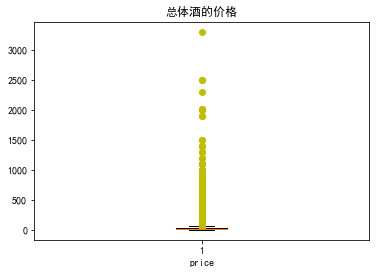

In [83]:
plt.boxplot(wine['price'].dropna(), notch=False, sym='y', vert=True)
plt.xlabel('price')
plt.title('总体酒的价格')
plt.show()

**price集中在某一小范围内。有大量离群点**

In [67]:
#统计数量最多的前10个国家红酒平均point
Countries = wine['country'].value_counts()[:10]
Countries


US             116901
France          43191
Italy           43018
Spain           14913
Portugal        11013
Chile           10288
Argentina        9431
Australia        7286
Austria          6402
New Zealand      4739
Name: country, dtype: int64

[88.16610636350416, 88.884559283184, 88.48114742665861, 86.93254207738215, 88.15717788068646, 86.3822900466563, 86.28385112925459, 88.11240735657425, 89.70759137769447, 87.77843426883308]


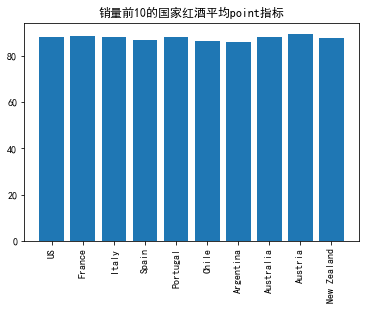

In [72]:
country = Countries.index
mean_points=[]
for c in country:
    temp = wine.loc[wine['country']==c]
    sum_points = temp['points'].sum()
    mean_points.append(sum_points*1.0/Countries[c])
print(mean_points)
    
plt.bar(country, mean_points)
plt.xticks(rotation=90)
plt.title('销量前10的国家红酒平均point指标')
plt.show()

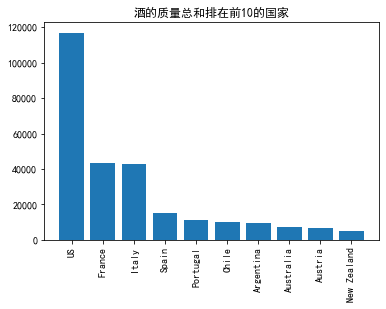

In [73]:
points = [Countries[i] for i in range(10)]
plt.bar(country, points)
plt.xticks(rotation=90)
plt.title('酒的质量总和排在前10的国家')
plt.show()

In [76]:
#对价格进行分析
wine['price'].describe()

count    258210.000000
mean         34.177162
std          38.611708
min           4.000000
25%          16.000000
50%          25.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64

**可以看到价格均值为34.17，最大值为3300，最小为4**

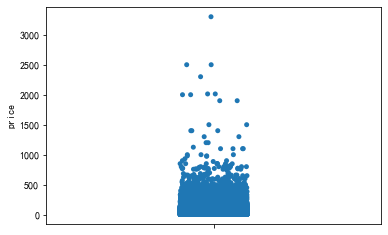

In [77]:
#画出price的分布散点图
sns.stripplot(y='price', data=wine)
plt.show()

D:\AnaConda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


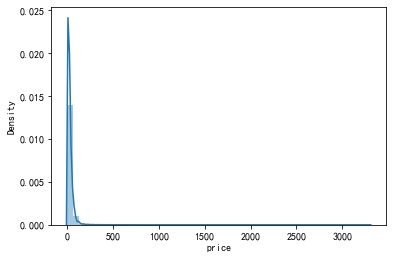

In [78]:
#画price的直方图与核概率密度图 过滤缺失值 
sns.distplot(wine.price.dropna())
plt.show()

**价格分布较为集中，主要分布在0-200之间**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'Grüner Veltliner'),
  Text(1, 0, 'Chardonnay'),
  Text(2, 0, 'Chardonnay'),
  Text(3, 0, 'Bordeaux-style Red Blend'),
  Text(4, 0, 'Bordeaux-style Red Blend'),
  Text(5, 0, 'Bordeaux-style Red Blend'),
  Text(6, 0, 'Bordeaux-style Red Blend'),
  Text(7, 0, 'Bordeaux-style Red Blend'),
  Text(8, 0, 'Chardonnay'),
  Text(9, 0, 'Chardonnay'),
  Text(10, 0, 'Bordeaux-style Red Blend'),
  Text(11, 0, 'Bordeaux-style Red Blend'),
  Text(12, 0, 'Bordeaux-style Red Blend'),
  Text(13, 0, 'Bordeaux-style Red Blend'),
  Text(14, 0, 'Bordeaux-style Red Blend'),
  Text(15, 0, 'Bordeaux-style Red Blend'),
  Text(16, 0, 'Bordeaux-style Red Blend'),
  Text(17, 0, 'Grüner Veltliner'),
  Text(18, 0, 'Pinot Noir'),
  Text(19, 0, 'Bordeaux-style Red Blend'),
  Text(20, 0, 'Bordeaux-style Red Blend'),
  Text(21, 0, 'Pinot Noir'),
  Text(22, 0, 'Pinot Noir'),
  Text(23, 0, 'Chardo

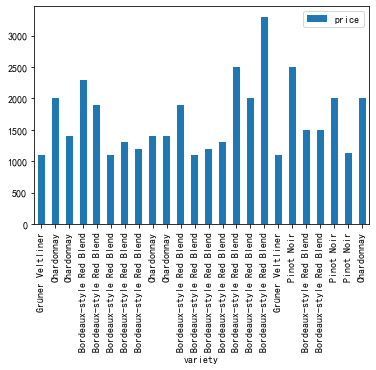

In [91]:
#讨论高价的酒是否与其原料有关
High_price = wine[wine.price>1000]
temp = High_price[['price','variety']]
temp.plot(kind='bar', x='variety', y='price')
plt.xticks(rotation=90)
# plt.bar(temp.variety,temp.price)
# plt.xticks(rotation=90)
# plt.show()

**可以看到不同原料酿造的酒价格各有不同**

## 2. 数据缺失的处理

In [101]:
#定义 标称属性数据基本信息及可视化数据函数
def Visualization(Series):
#     Dict = {}
    data = Series.value_counts()
#     name = data.index[:]
    name = data.index[:20]
#     counts = [data[name[i]] for i in range(len(data))]
    counts = [data[name[i]] for i in range(20)]
    frequence = [counts[i]/sum(counts) for i in range(20)]
    dataframe = pd.DataFrame(counts, index=name, columns=['count'])
    dataframe['freq'] = frequence
    print(dataframe)
    plt.bar(name, counts)
    plt.xticks(rotation=90)
    plt.show()

               count      freq
US            116901  0.418053
France         43191  0.154457
Italy          43018  0.153838
Spain          14913  0.053331
Portugal       11013  0.039384
Chile          10288  0.036791
Argentina       9431  0.033726
Australia       7286  0.026056
Austria         6402  0.022894
New Zealand     4739  0.016947
Germany         4617  0.016511
South Africa    3659  0.013085
Greece          1350  0.004828
Israel          1135  0.004059
Canada           453  0.001620
Hungary          377  0.001348
Romania          259  0.000926
Bulgaria         218  0.000780
Uruguay          201  0.000719
Slovenia         181  0.000647


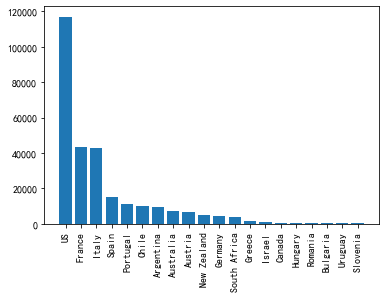

In [102]:
#wine['country']的原始数据
Visualization(wine['country'])

In [104]:
#处理缺失值方式1：剔除缺失值
country_1 = wine['country'].dropna()
country_1.isnull().sum()

0

               count      freq
US            116901  0.418053
France         43191  0.154457
Italy          43018  0.153838
Spain          14913  0.053331
Portugal       11013  0.039384
Chile          10288  0.036791
Argentina       9431  0.033726
Australia       7286  0.026056
Austria         6402  0.022894
New Zealand     4739  0.016947
Germany         4617  0.016511
South Africa    3659  0.013085
Greece          1350  0.004828
Israel          1135  0.004059
Canada           453  0.001620
Hungary          377  0.001348
Romania          259  0.000926
Bulgaria         218  0.000780
Uruguay          201  0.000719
Slovenia         181  0.000647


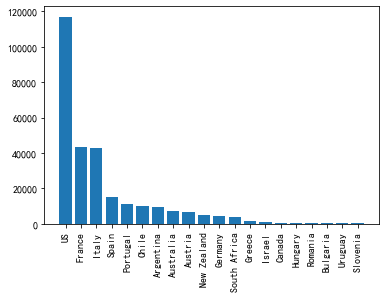

In [105]:
#可视化剔除之后的数据
Visualization(country_1)

In [109]:
#处理缺失值方式2：高频填充 （众数）
country_2 = wine['country'].fillna(wine['country'].mode()[0])
country_2.isnull().sum()

0

               count      freq
US            116969  0.418194
France         43191  0.154419
Italy          43018  0.153801
Spain          14913  0.053318
Portugal       11013  0.039374
Chile          10288  0.036782
Argentina       9431  0.033718
Australia       7286  0.026049
Austria         6402  0.022889
New Zealand     4739  0.016943
Germany         4617  0.016507
South Africa    3659  0.013082
Greece          1350  0.004827
Israel          1135  0.004058
Canada           453  0.001620
Hungary          377  0.001348
Romania          259  0.000926
Bulgaria         218  0.000779
Uruguay          201  0.000719
Slovenia         181  0.000647


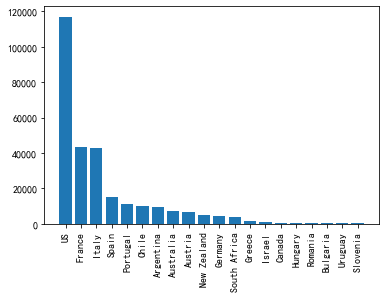

In [110]:
#可视化高频填充后的数据
Visualization(country_2)

**可以看到填充后count 和 freq都增加了**

**处理designation属性**

In [111]:
wine.designation.isnull().sum()

83200

In [112]:
wine.designation.value_counts()

Reserve                       4761
Reserva                       3069
Estate                        2893
Barrel sample                 1701
Riserva                       1452
                              ... 
Signature Collection Amore       1
Madame de                        1
Fritz Willi Frizzante            1
Proprietary Rosato di            1
Padre Pedro Reserva Branco       1
Name: designation, Length: 47239, dtype: int64

                      count      freq
Reserve                4761  0.203880
Reserva                3069  0.131423
Estate                 2893  0.123887
Barrel sample          1701  0.072842
Riserva                1452  0.062179
Brut                   1137  0.048690
Estate Grown           1070  0.045820
Barrel Sample           891  0.038155
Crianza                 846  0.036228
Dry                     787  0.033702
Estate Bottled          738  0.031603
Gran Reserva            591  0.025308
Old Vine                552  0.023638
Vieilles Vignes         533  0.022825
Brut Rosé               524  0.022439
Extra Dry               448  0.019185
Tradition               379  0.016230
Rosé                    346  0.014817
Réserve                 319  0.013661
Bien Nacido Vineyard    315  0.013489


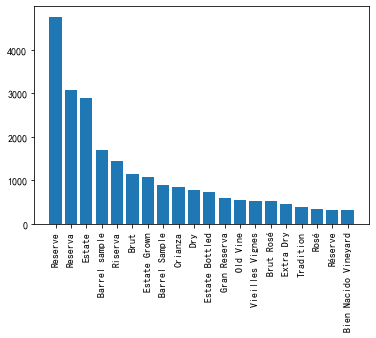

In [114]:
#可视化未处理前的designation数据
Visualization(wine['designation'])

0
                      count      freq
Reserve                4761  0.203880
Reserva                3069  0.131423
Estate                 2893  0.123887
Barrel sample          1701  0.072842
Riserva                1452  0.062179
Brut                   1137  0.048690
Estate Grown           1070  0.045820
Barrel Sample           891  0.038155
Crianza                 846  0.036228
Dry                     787  0.033702
Estate Bottled          738  0.031603
Gran Reserva            591  0.025308
Old Vine                552  0.023638
Vieilles Vignes         533  0.022825
Brut Rosé               524  0.022439
Extra Dry               448  0.019185
Tradition               379  0.016230
Rosé                    346  0.014817
Réserve                 319  0.013661
Bien Nacido Vineyard    315  0.013489


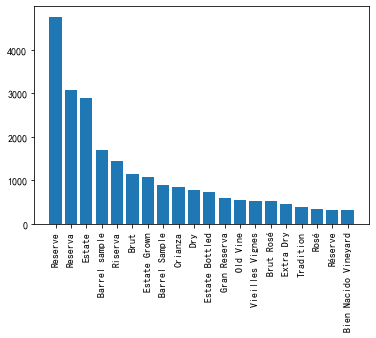

In [117]:
#剔除缺失值
designation_1 = wine.designation.dropna()
print(designation_1.isnull().sum())
Visualization(designation_1)

In [119]:
#高频填充缺失值
designation_2 = wine.designation.fillna(wine_designation.mode()[0])
designation_2.isnull().sum()

0

                      count      freq
Reserve               87961  0.825522
Reserva                3069  0.028803
Estate                 2893  0.027151
Barrel sample          1701  0.015964
Riserva                1452  0.013627
Brut                   1137  0.010671
Estate Grown           1070  0.010042
Barrel Sample           891  0.008362
Crianza                 846  0.007940
Dry                     787  0.007386
Estate Bottled          738  0.006926
Gran Reserva            591  0.005547
Old Vine                552  0.005181
Vieilles Vignes         533  0.005002
Brut Rosé               524  0.004918
Extra Dry               448  0.004205
Tradition               379  0.003557
Rosé                    346  0.003247
Réserve                 319  0.002994
Bien Nacido Vineyard    315  0.002956


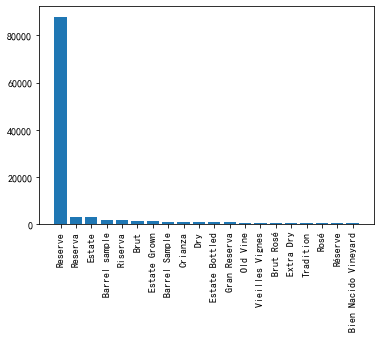

In [120]:
Visualization(designation_2)

**可以看到reserve占比最大 为82.5%**

**处理数值属性price缺失数据**

In [126]:
#定义数值标签可视化函数
def Visualization_1(Series):
    print(Series.describe())
    sns.distplot(Series)

In [122]:
wine['price'].isnull().sum()

22691

count    258210.000000
mean         34.177162
std          38.611708
min           4.000000
25%          16.000000
50%          25.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64


D:\AnaConda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


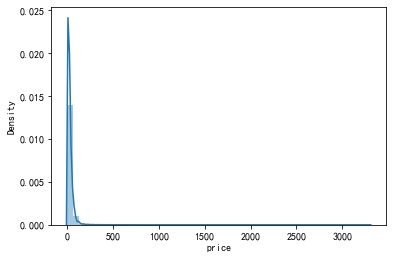

In [127]:
#原始数据可视化
Visualization_1(wine['price'])

In [128]:
#剔除缺失值
price_1 = wine['price'].dropna()

In [129]:
price_1.isnull().sum()

0

count    258210.000000
mean         34.177162
std          38.611708
min           4.000000
25%          16.000000
50%          25.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64


D:\AnaConda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


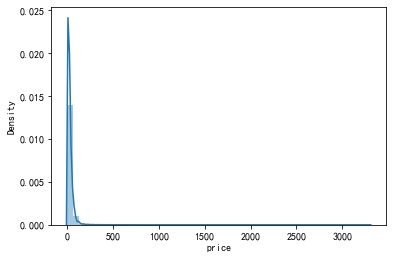

In [133]:
#可视化剔除后的数据
Visualization_1(price_1)

**剔除后price五数概括分布于原始数据差别不大，所以price缺失值主要集中在高价位**

In [132]:
#高频填充缺失值
price_2 = wine['price'].fillna(wine['price'].mode()[0])
price_2.isnull().sum()

0

count    280901.000000
mean         33.031940
std          37.220385
min           4.000000
25%          17.000000
50%          23.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64


D:\AnaConda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


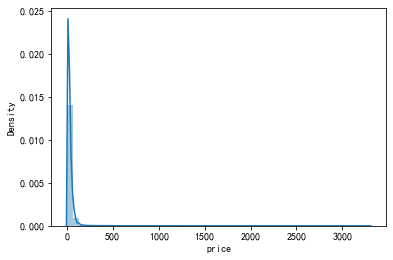

In [134]:
#可视化高频填充后的数据
Visualization_1(price_2)

# 分析crime record数据集
## 1.数据摘要与可视化
### 1.1 数据摘要

In [136]:
#将2011至2016年所有数据整合
crime_data = pd.DataFrame()
for i in range(2011,2017):
    path = "D:\\datamining2021\\datasets\\archive\\records-for-" + str(i) + ".csv"
    crime_i = pd.read_csv(path)
    crime_data = pd.concat([crime_i,crime_data])
    
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046388 entries, 0 to 180015
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Agency                     1046384 non-null  object 
 1   Create Time                1046384 non-null  object 
 2   Location                   483425 non-null   object 
 3   Area Id                    864023 non-null   object 
 4   Beat                       1040583 non-null  object 
 5   Priority                   1046384 non-null  float64
 6   Incident Type Id           1046384 non-null  object 
 7   Incident Type Description  1045996 non-null  object 
 8   Event Number               1046384 non-null  object 
 9   Closed Time                1046359 non-null  object 
 10  Location 1                 374799 non-null   object 
 11  Zip Codes                  352 non-null      float64
 12  Location                   188052 non-null   object 
dtypes: float64(2)

In [137]:
crime_data.head()

,Agency,Create Time,Location,Area Id,Beat,Priority,Incident Type Id,Incident Type Description,Event Number,Closed Time,Location 1,Zip Codes,Location
0,OP,2016-01-01T00:00:57.000,ST&MARKET ST,P1,05X,2.0,415GS,415 GUNSHOTS,LOP160101000003,2016-01-01T00:32:30.000,NaN,NaN,NaN
1,OP,2016-01-01T00:01:25.000,AV&HAMILTON ST,P3,26Y,2.0,415GS,415 GUNSHOTS,LOP160101000005,2016-01-01T00:48:23.000,NaN,NaN,NaN
2,OP,2016-01-01T00:01:43.000,ST&CHESTNUT ST,P1,02X,2.0,415GS,415 GUNSHOTS,LOP160101000008,2016-01-01T00:21:24.000,NaN,NaN,NaN
3,OP,2016-01-01T00:01:48.000,WALLACE ST,P2,18Y,2.0,415GS,415 GUNSHOTS,LOP160101000007,2016-01-01T01:15:03.000,NaN,NaN,NaN
4,OP,2016-01-01T00:02:05.000,90TH AV,P3,34X,2.0,415GS,415 GUNSHOTS,LOP160101000009,2016-01-01T00:54:52.000,NaN,NaN,NaN


#### 1.1.1标称属性

In [138]:
#crime_data数据集的标称属性有Location 、Area Id、 Incident Type Id 无数值属性
crime_data['Location'].value_counts()

 INTERNATIONAL BLVD           5851
 AV&INTERNATIONAL BLVD        4935
 MACARTHUR BLVD               4918
 BROADWAY                     3879
 INTERNATIONAL BLVD           3866
                              ... 
8TH CURRAN AV                    1
46TH 39TH AV                     1
5771-5888 FLORIDA ST             1
64TH AV&ARTHUR ST                1
80TH 20TH ST                     1
Name: Location, Length: 83872, dtype: int64

In [139]:
crime_data['Area Id'].value_counts()

1.0    290452
2.0    236700
P3     129054
P1     114560
P2      53033
3.0     32907
POU      5960
PCW       789
5.0       320
4.0       236
TEC        10
WAG         1
JLS         1
Name: Area Id, dtype: int64

In [140]:
crime_data['Incident Type Id'].value_counts()

933R     98497
SECCK    70965
415      66720
911H     54935
10851    47958
         ...  
626_1        1
666          1
243C         1
148_1        1
SUB          1
Name: Incident Type Id, Length: 288, dtype: int64

In [141]:
crime_data['Priority'].value_counts()

2.0    814818
1.0    231542
0.0        24
Name: Priority, dtype: int64

In [143]:
crime_data['Zip Codes'].value_counts()

4560.0     8
1481.0     5
14519.0    5
4380.0     4
27099.0    3
          ..
22477.0    1
5572.0     1
22281.0    1
22247.0    1
2050.0     1
Name: Zip Codes, Length: 287, dtype: int64

### 1.2 数据可视化

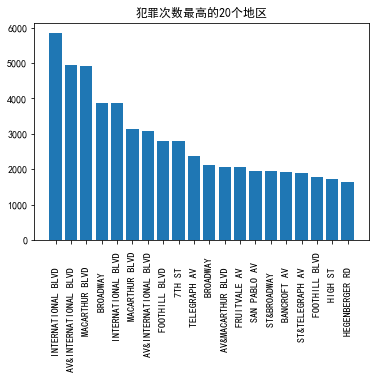

In [145]:
#显示犯罪最多的20个地区
locations = crime_data['Location'].value_counts()[:20]
loc = locations.index
num = [locations[i] for i in range(20)]
plt.bar(loc, num)
plt.xticks(rotation = 90)
plt.title('犯罪次数最高的20个地区')
plt.show()

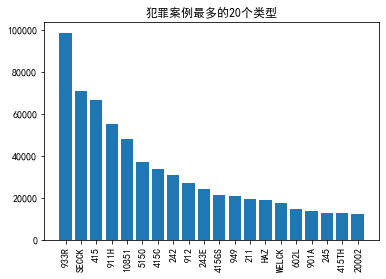

In [147]:
#可视化犯罪最多的类型
crime_types = crime_data['Incident Type Id'].value_counts()[:20]
type_ids = crime_types.index
num = [crime_types[i] for i in range(20)]
plt.bar(type_ids, num)
plt.xticks(rotation = 90)
plt.title('犯罪案例最多的20个类型')
plt.show()

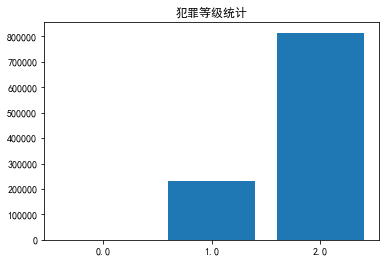

In [161]:
#犯罪等级统计
prioritys = crime_data['Priority'].value_counts()
priority_name = prioritys.index
num = [prioritys[i] for i in range(len(prioritys))]
plt.bar(['0.0','1.0','2.0'], num)
plt.title('犯罪等级统计')
plt.show()

**可以看到二级犯罪数量是最高的，0.0级犯罪数量相对极少**

## 2. 缺失值处理

In [163]:
crime_data.isnull().sum()

Agency                             4
Create Time                        4
Location                      562963
Area Id                       182365
Beat                            5805
Priority                           4
Incident Type Id                   4
Incident Type Description        392
Event Number                       4
Closed Time                       29
Location 1                    671589
Zip Codes                    1046036
Location                      858336
dtype: int64

In [164]:
#location属性缺失值较多，以location为例
#先剔除缺失值
location_1 = crime_data['Location'].dropna()
location_1.isnull().sum()

0

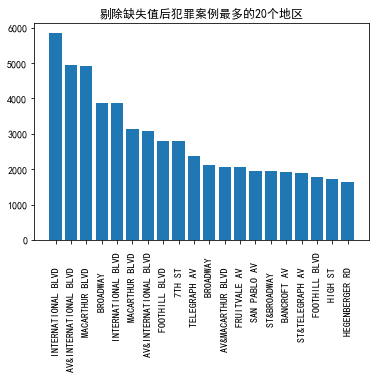

In [171]:
#可视化剔除后的数据
dropna_locs = location_1.value_counts()[:20]
dropna_locs_name = dropna_locs.index
dropna_locs_num = [dropna_locs[i] for i in range(20)]
plt.bar(dropna_locs_name,dropna_locs_num)
plt.xticks(rotation = 90)
plt.title('剔除缺失值后犯罪案例最多的20个地区')
plt.show()

In [170]:
#高频填充
location_2 = crime_data['Location'].fillna(crime_data['Location'].mode()[0]) 
location_2.isnull().sum()

0

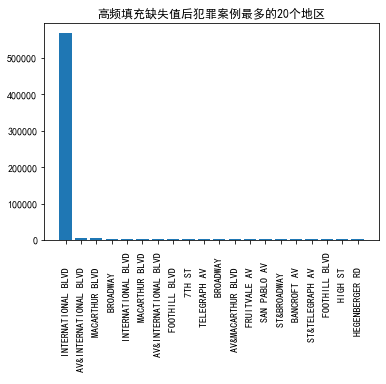

In [172]:
#可视化高频填充后的数据
fill_locs = location_2.value_counts()[:20]
fill_locs_name = fill_locs.index
fill_locs_num = [fill_locs[i] for i in range(20)]
plt.bar(fill_locs_name, fill_locs_num)
plt.xticks(rotation = 90)
plt.title('高频填充缺失值后犯罪案例最多的20个地区')
plt.show()

**可以看到由于缺失值较多，高频填充后是情况如上**